This notebook is for Exploratory Data Analysis to the weather data of Beijing from 2013 to 2023.
Feel free to edit and update this notebook to share some insights.🧠

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.dates as mdates

Some basic statistics of the numeric columns.

In [2]:
df = pd.read_csv('./Beijing.csv')
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3866.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,571.000000,3867.000000
mean,19.152625,7.310835,13.340678,18.923145,5.806594,12.601681,10.687949,53.865451,1.114341,17.817430,...,18.568011,175.873571,1016.584584,33.451720,8.870830,190.572847,16.454021,6.527541,11.900175,0.483085
std,11.476058,11.539349,11.302204,12.798192,13.224134,12.759347,22.729080,19.754334,6.663169,38.270889,...,9.687732,108.590224,10.399529,25.543833,3.929723,82.120636,7.099217,2.132316,8.085433,0.288705
min,-13.000000,-23.000000,-15.000000,-19.900000,-32.300000,-25.800000,-33.500000,7.400000,0.000000,0.000000,...,3.800000,0.200000,990.200000,0.000000,0.600000,6.100000,0.300000,0.000000,10.000000,0.000000
25%,9.000000,-3.000000,2.700000,7.600000,-6.000000,0.700000,-6.500000,38.400000,0.000000,0.000000,...,11.000000,92.000000,1007.600000,11.900000,6.400000,119.250000,10.300000,5.000000,10.000000,0.250000
50%,20.400000,8.000000,14.500000,20.400000,6.900000,14.400000,8.600000,53.400000,0.000000,0.000000,...,16.300000,160.100000,1016.700000,29.100000,8.300000,181.900000,15.700000,7.000000,10.000000,0.480000
75%,29.100000,18.000000,23.850000,29.400000,18.000000,23.800000,20.000000,69.950000,0.000000,0.000000,...,21.600000,292.950000,1025.000000,51.200000,11.100000,258.850000,22.400000,8.000000,10.000000,0.750000
max,42.000000,28.400000,33.000000,48.100000,33.600000,40.500000,81.100000,100.000000,254.000000,100.000000,...,84.500000,359.900000,1045.400000,100.000000,30.000000,362.500000,31.600000,10.000000,75.000000,0.980000


There are 7 different icons in total, so we have to create 7 animations if we want to make some fancy things like Apple Weather.🌦️

In [3]:
icon = pd.Series(df['icon'])
print(icon.unique())

['clear-day' 'partly-cloudy-day' 'snow' 'cloudy' 'rain' 'wind' 'fog']


The figure below shows the temperature changes within Year 2013, just a sanity check that we are manipulating the right data.👌

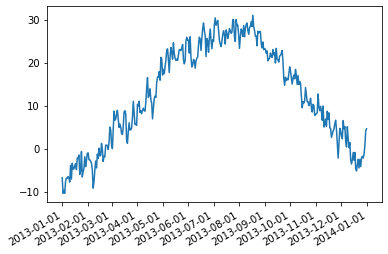

In [4]:
dates = df['datetime']
dates_2013 = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates][0:365]
temp_2013 = df['temp'][0:365]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(dates_2013, temp_2013)
plt.gcf().autofmt_xdate()

You can see the perfect periodic shape of the moonphase changes within a year.😂

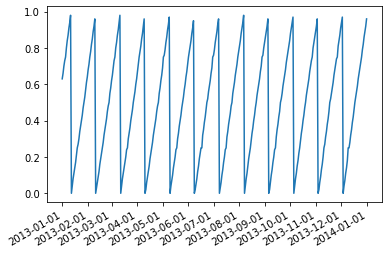

In [5]:
moonphase_2013 = df['moonphase'][0:365]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(dates_2013, moonphase_2013)
plt.gcf().autofmt_xdate()

The figure below shows the change in tempmax from 2013 to 2023.

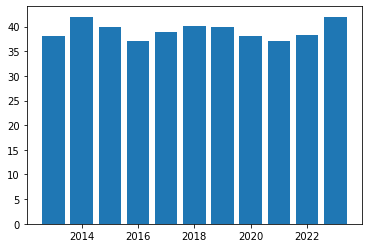

In [6]:
year_temp_max = dict()
for year in range(2013, 2024):
    year_temp_max[year] = df[df['datetime'].str.match('{}'.format(year))].tempmax.max()
plt.bar(*zip(*year_temp_max.items()))
plt.show()

The figure below shows the change in tempmin from 2013 to 2023.

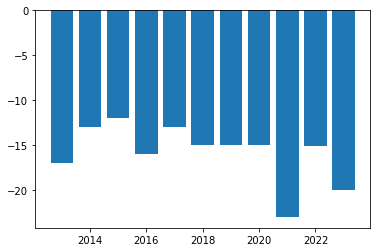

In [7]:
year_temp_min = dict()
for year in range(2013, 2024):
    year_temp_min[year] = df[df['datetime'].str.match('{}'.format(year))].tempmin.min()
plt.bar(*zip(*year_temp_min.items()))
plt.show()

This figure below shows the top THRESHOLD_RATIO of total # of extreme-weather days in 10 years.

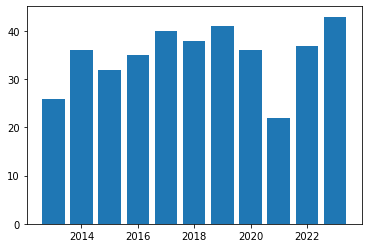

In [17]:
THRESHOLD_RATIO = 0.1
temp_max_df = df.sort_values(by='tempmax', ascending=False)
sub_df = temp_max_df.head(int(len(temp_max_df) * THRESHOLD_RATIO))
cnt = dict()
for year in range(2013, 2024):
    cnt[year] = len(sub_df[sub_df['datetime'].str.match('{}'.format(year))])
plt.bar(*zip(*cnt.items()))
plt.show()
